In [16]:
from pathlib import Path
import matplotlib.pyplot as plt

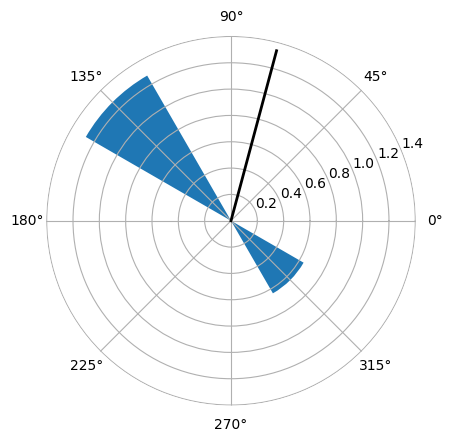

In [12]:
#Artificial points - (-1, 1), (-1, 1), and (1, -1)
import pandas as pd
import numpy as np

df = pd.read_csv(Path("D:\Sandro_Code\Book1.csv"))
directionX = df['direction_local_x']
directionY = df['direction_local_y']
angles = np.arctan2(directionY, directionX)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.hist(angles, bins=12, range=(-np.pi, np.pi), density=True)

# Calculate the average angle
average_angle = np.mean(angles)

# Plot the average line as a black solid line
ax.plot([average_angle, average_angle], [0, ax.get_ylim()[1]], color='black', linewidth=2)

# Remove the outer circle
ax.spines['polar'].set_visible(False)

plt.show()

CSV file 'randomized_polar_histogram.csv' generated successfully.
0.3947412627000648


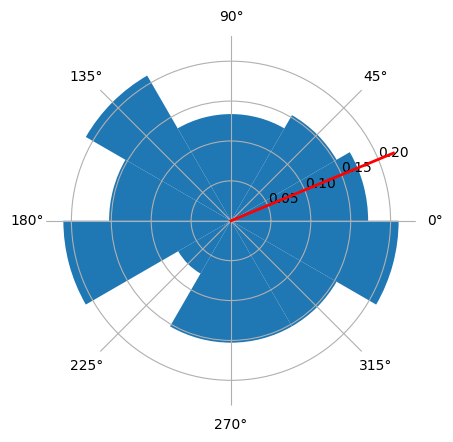

In [13]:
#Uniform and Random Polar Histogram Generation
import csv
import math
import random

# Number of points
num_points = 100

# Create a list to store coordinates
coordinates = []

# Generate random angles
angles = [random.uniform(0, 2*math.pi) for _ in range(num_points)]

# Sort angles in ascending order
angles.sort()

# Generate coordinates with randomized polar histogram distribution
for angle in angles:
    x = math.cos(angle)
    y = math.sin(angle)
    coordinates.append((x, y))

# Write coordinates to a CSV file
filename = "randomized_polar_histogram.csv"
with open(filename, 'w', newline='') as csvfile:
    fieldnames = ['direction_local_x', 'direction_local_y']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for coord in coordinates:
        writer.writerow({'direction_local_x': coord[0], 'direction_local_y': coord[1]})

print(f"CSV file '{filename}' generated successfully.")


import pandas as pd
import numpy as np

df = pd.read_csv(filename)
directionX = df['direction_local_x']
directionY = df['direction_local_y']
angles = np.arctan2(directionY, directionX)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.hist(angles, bins=12, range=(-np.pi, np.pi), density=True)

# Calculate the average angle
average_angle = np.arctan2(np.mean(np.sin(angles)), np.mean(np.cos(angles)))
print(average_angle)

# Plot the average line
ax.plot([0, average_angle], [0, ax.get_ylim()[1]], color='red', linewidth=2)

# Remove the outer circle
ax.spines['polar'].set_visible(False)

plt.show()

-1.6063625524770584


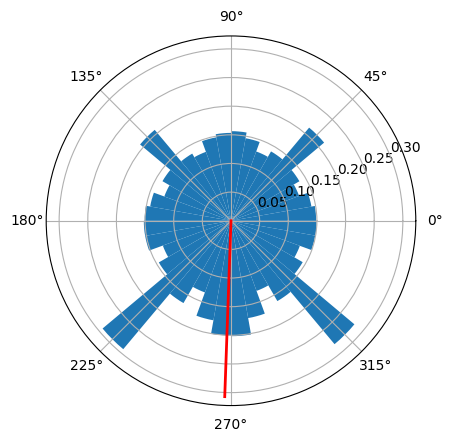

In [61]:
#Check if wave_id produces results, checked by planar wave diagram
import pandas as pd
import numpy as np
from pathlib import Path
import csv

wave_id = 11
df = pd.read_csv(Path("D:\ANESTH_EricMs1Ket_KX_16\stage05_channel-wave_characterization\direction_local\\wavefronts_direction_local.csv"))
if wave_id in df['wavefronts_id'].values:
    directionX = df['direction_local_x']
    directionY = df['direction_local_y']
    angles = np.arctan2(directionY, directionX)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.hist(angles, bins=36, range=(-np.pi, np.pi), density=True)

    # Calculate the average angle
    average_angle = np.arctan2(np.mean(np.sin(angles)), np.mean(np.cos(angles)))
    print(average_angle)

    # Plot the average line
    ax.plot([0, average_angle], [0, ax.get_ylim()[1]], color='red', linewidth=2)

    plt.show()

-0.02303360224546496
-0.7941162371076228


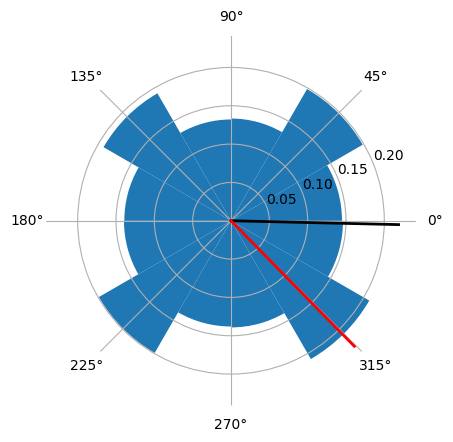

0.00690761883252377
1.0297790870646306


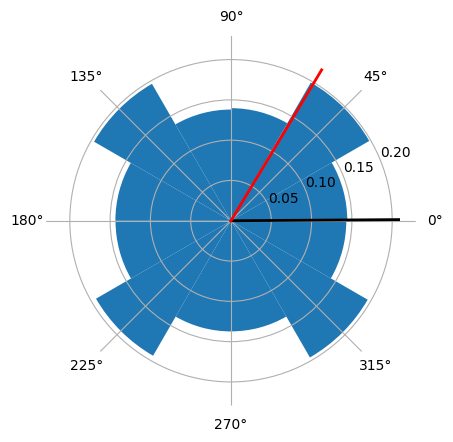

-0.015676598285155944
-0.561436554698298


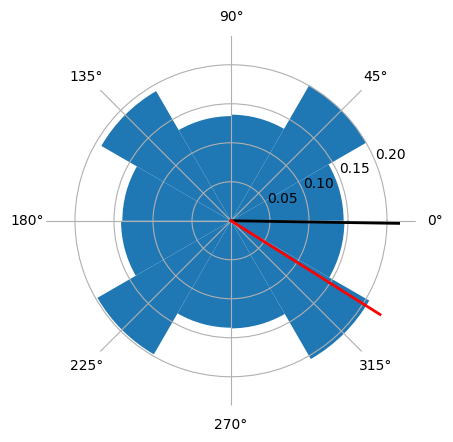

-0.012452816929954745
-1.277208522036941


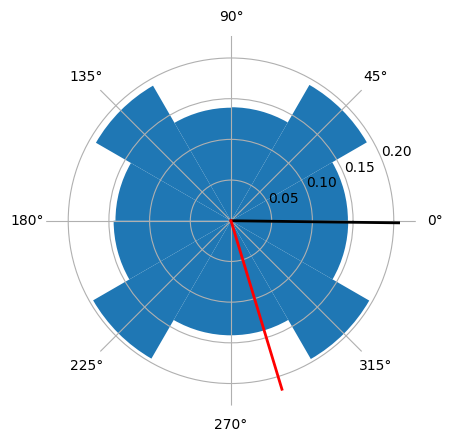

-0.003233430363626718
-2.386959977865074


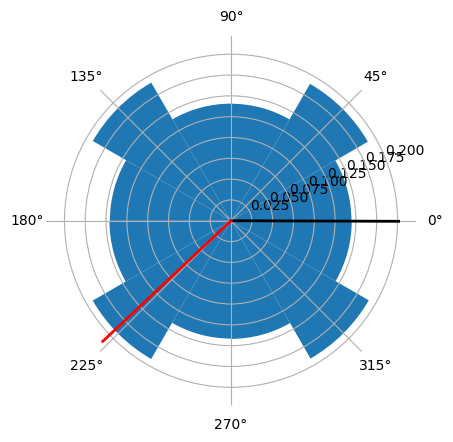

-0.013994930110965547
-1.150633495692664


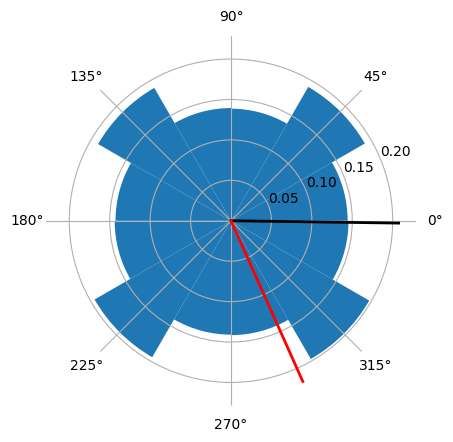

-0.03305376710753096
-1.5350029469139748


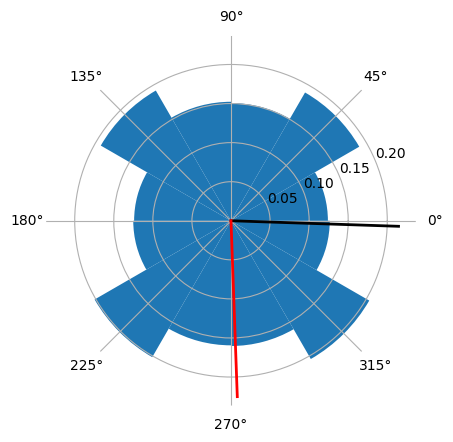

-0.015604318012584738
-1.774807432966874


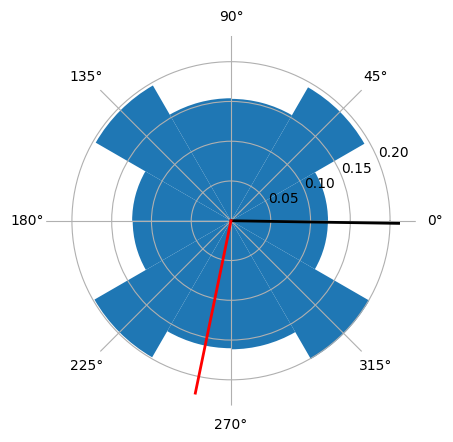

-0.013238061390110693
-1.7280819016919011


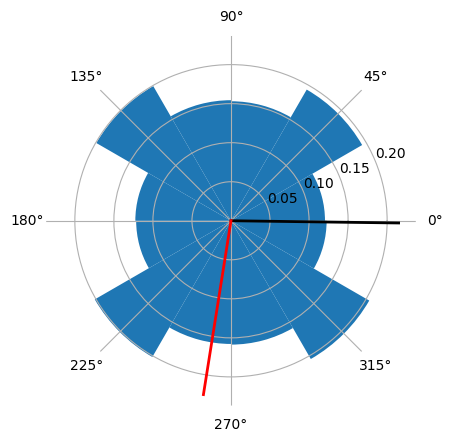

-0.013620272445204886
-0.6818921844340952


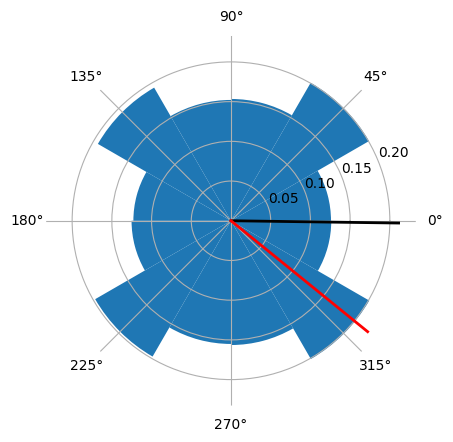

-0.018303954030311903
-2.094211969716716


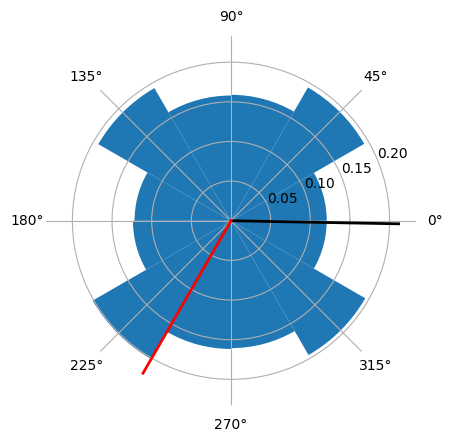

-0.015775832728167974
-0.6699685508462444


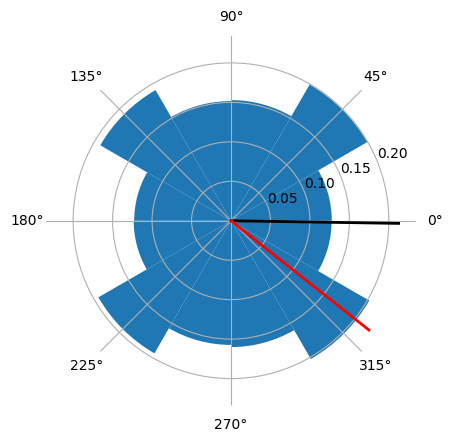

-0.0455769553809269
-1.2230779442374624


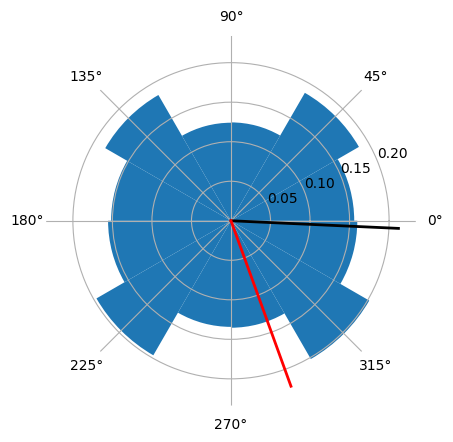

-0.032173875080614686
-1.1091050637114142


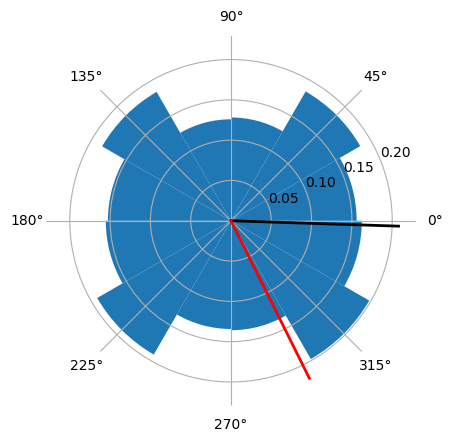

-0.04197873485313269
-1.5989387934270465


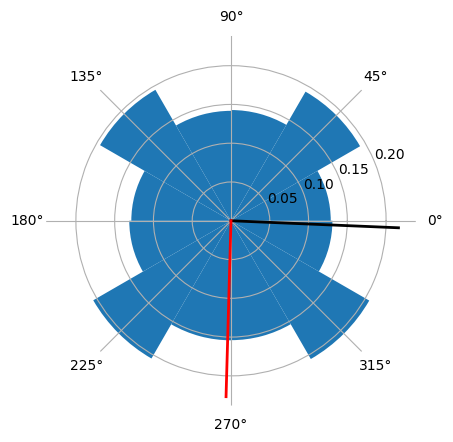

-0.03239796860011568
-1.6782220491142599


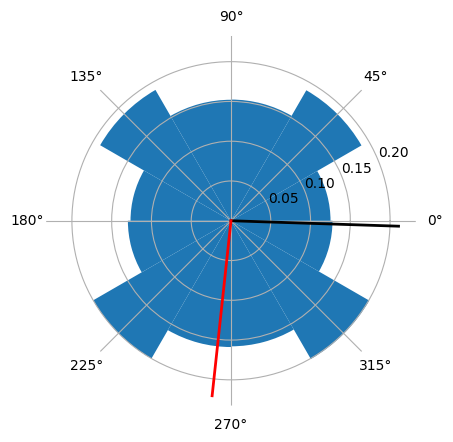

-0.03151493462062406
-1.7959282724780947


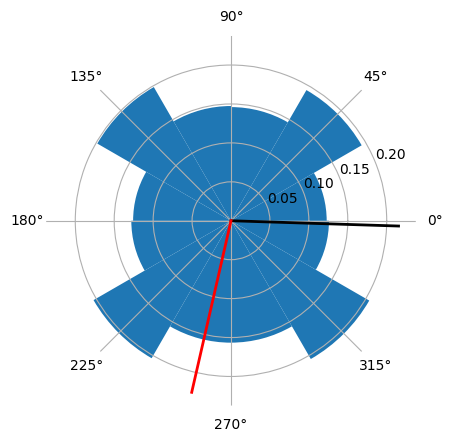

-0.005848622595477831
-1.2880046966607626


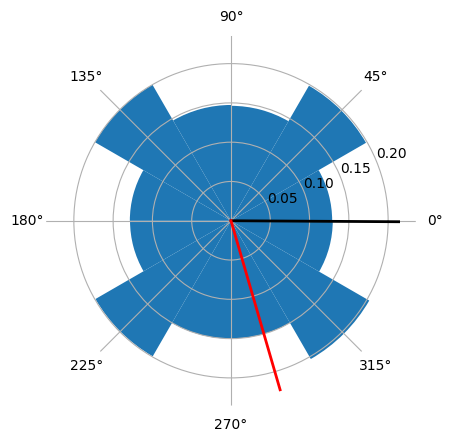

-0.012635855768715669
-1.321396586242118


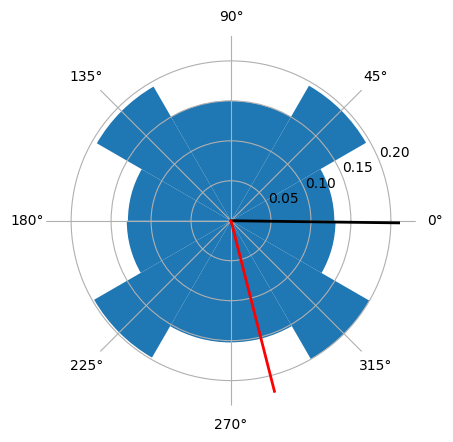

0.0062098349646849856
1.011230730431273


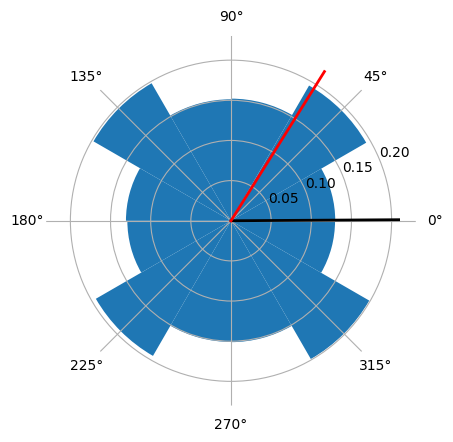

In [124]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for k, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\direction_local\\wavefronts_direction_local.csv"))
    directionX = df['direction_local_x']
    directionY = df['direction_local_y']
    angles = np.arctan2(directionY, directionX)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.hist(angles, bins=12, range=(-np.pi, np.pi), density=True)

    # Calculate the average angle
    average_angles = np.mean(angles)
    print(average_angles)

    # Plot the average line as a black solid line
    ax.plot([average_angles, average_angles], [0, ax.get_ylim()[1]], color='black', linewidth=2)

    # Calculate the average angle
    average_angle = np.arctan2(np.mean(np.sin(angles)), np.mean(np.cos(angles)))
    print(average_angle)

    # Plot the average line
    ax.plot([0, average_angle], [0, ax.get_ylim()[1]], color='red', linewidth=2)


    # Remove the outer circle
    ax.spines['polar'].set_visible(False)

    plt.show()

    

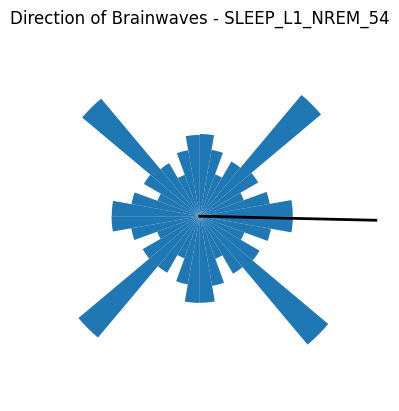

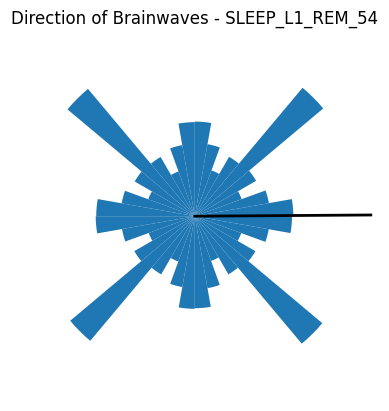

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [114]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for k, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\direction_local\\wavefronts_direction_local.csv"))
    directionX = df['direction_local_x']
    directionY = df['direction_local_y']
    angles = np.arctan2(directionY, directionX)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.hist(angles, bins=36, range=(-np.pi, np.pi), density=True)
    ax.grid(False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(f'Direction of Brainwaves - {filename}')
    
   # Calculate the average angle
    average_angle = np.mean(angles)
    
    # Plot the average line as a black solid line
    ax.plot([average_angle, average_angle], [0, ax.get_ylim()[1]], color='black', linewidth=2)
    
    # Remove the outer circle
    ax.spines['polar'].set_visible(False)
    
    plt.show()
    
    

In [ ]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for k, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\direction_local\\wavefronts_direction_local.csv"))
    directionX = 'direction_local_x'
    directionY = 'direction_local_y'
    delta_x = df[directionX].diff()
    delta_y= df[directionY].diff()
    plt.scatter(delta_x, delta_y)
    plt.title(f'Direction of Brainwaves - {filename}')
    print(int(df['direction_local_x'].sum()))
    
 
    
    plt.show()

In [ ]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for k, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\direction_local\\wavefronts_direction_local.csv"))
    directionX = df['direction_local_x']
    directionY = df['direction_local_y']
    angles = np.arctan2(directionY, directionX)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.hist(angles, bins=36, range=(-2*np.pi, 2*np.pi), density=True)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)  # Remove the radial grid lines
    plt.title(f'Direction of Brainwaves - {filename}')
    
   # Calculate the average angle
    average_angle = np.mean(angles)
    
    # Plot the average line as a black solid line
    plt.plot([average_angle, average_angle], [0, ax.get_ylim()[1]], color='black', linewidth=2)
    
    # Remove the outer circle
    ax.spines['polar'].set_visible(False)
    
        
    
    plt.show()

In [ ]:
data = (
'SLEEP_L1_NREM_54', 
'SLEEP_L1_REM_54',
'SLEEP_L1_WAKE_54',
'SLEEP_L3_NREM_54', 
'SLEEP_L3_REM_54',
'SLEEP_L3_WAKE_54',
'SLEEP_E2_NREM_54', 
'SLEEP_E2_REM_54',
'SLEEP_E2_WAKE_54',
'SLEEP_119_2_NREM_54', 
'SLEEP_119_2_REM_54',
'SLEEP_119_2_WAKE_54',
'SLEEP_328A_3_NREM_54', 
'SLEEP_328A_3_WAKE_54',
'SLEEP_132_1_NREM_54', 
'SLEEP_132_1_REM_54',
'SLEEP_132_1_WAKE_54',
'SLEEP_132_2_NREM_54', 
'SLEEP_132_2_REM_54',
'SLEEP_132_2_WAKE_54',
)

import pandas as pd
import numpy as np

for a, file in enumerate(data):
    filename = file.strip()
    df = pd.read_csv(Path(f"D:\\{filename}\\stage05_channel-wave_characterization\\velocity_local\\wavefronts_velocity_local.csv"))
    sorts = df.groupby('velocity_local_unit')
    for sort in sorts:
        print(sorts.mean())